In [1]:
import numpy as np  
import matplotlib.pyplot as plt
from param_est import OnlineParamEst

In [7]:
param_est = OnlineParamEst()
# 1) Run both simulations
x_deka, u_deka, theta_deka, theta_hat_deka = param_est.simulate_quadrotor_hover_with_DEKA()
print("finished DEKA simulation")

Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
finished DEKA simulation


In [3]:
x_rls,  u_rls,  theta_rls,  theta_hat_rls  = param_est.simulate_quadrotor_hover_with_RLS()
print("finished RLS simulation")

Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
finished RLS simulation


In [4]:
x_kf,  u_kf,  theta_kf,  theta_hat_kf  = param_est.simulate_quadrotor_hover_with_KF()
print("finished KF simulation")
# x_mpc,  u_mpc,  theta_mpc,  theta_hat_mpc  = param_est.simulate_quadrotor_hover_with_no_estimation()
# print("finished naive mpc simulation")


# Suppose x_deka, x_rls each have shape (N, 3) for position in x,y,z.
# Also assume you have a desired (reference) trajectory x_des, shape (N, 3).
num_points = 600
angles = np.linspace(0, 6*np.pi, num_points, endpoint=False)
# Create the figure-8 in the XY-plane
x = np.sin(angles)
y = np.sin(2 * angles)
z = np.zeros_like(x)  # Initially flat in XY-plane

# Stack as a (3, num_points) matrix
traj = np.vstack((x, y, z))  # Shape: (3, num_points)

# Define rotation matrix (tilt around the Y-axis)
rot_ang= np.radians(30)  # Tilt angle in degrees
R = np.array([
    [np.cos(rot_ang), 0, np.sin(rot_ang)],  # Rotation matrix for X-Z plane
    [0, 1, 0],  # Keep Y unchanged
    [-np.sin(rot_ang), 0, np.cos(rot_ang)]
])

# Apply rotation
traj_rotated = (R @ traj).T  # Matrix multiplication
x_des = traj.T  # Transpose back to original shape
# 2) Plot x, y, z positions for DEKA vs RLS vs desired
t = np.arange(len(x_deka))  # time steps 0..N-1


Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
finished KF simulation


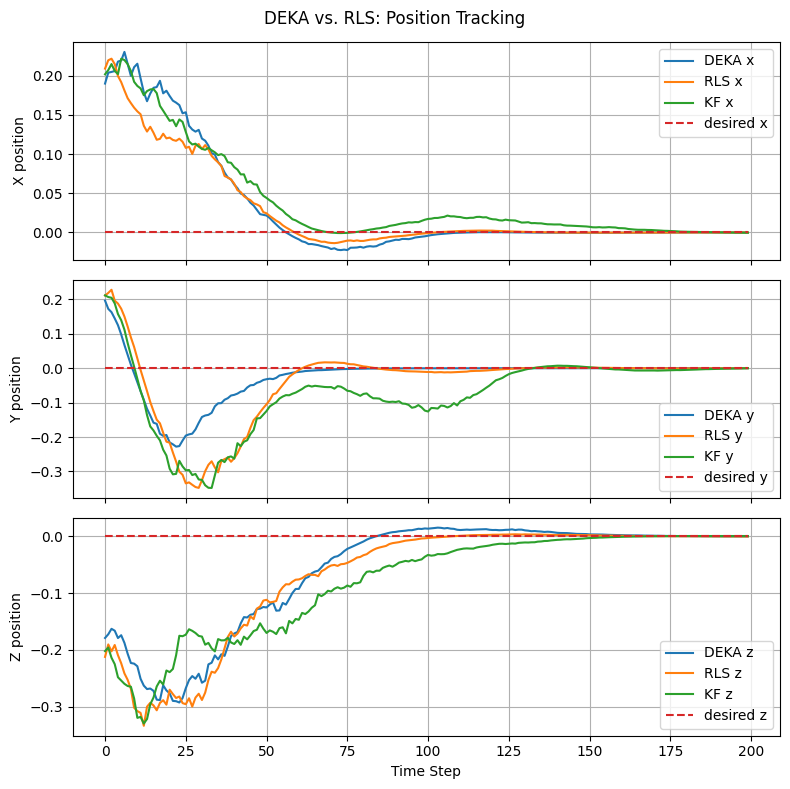

In [8]:
x_pos_deka  = [row[0] for row in x_deka]
x_pos_rls   = [row[0] for row in x_rls]
x_pos_kf   = [row[0] for row in x_kf]
# x_pos_mpc = [row[0] for row in x_mpc]
# x_pos_des   = [row[0] for row in x_des][:200]
y_pos_deka  = [row[1] for row in x_deka]
y_pos_rls   = [row[1] for row in x_rls]
y_pos_kf   = [row[1] for row in x_kf]
# y_pos_mpc = [row[1] for row in x_mpc]

# y_pos_des   = [row[1] for row in x_des][:200]
z_pos_deka  = [row[2] for row in x_deka]
z_pos_rls   = [row[2] for row in x_rls]
z_pos_kf   = [row[2] for row in x_kf]
# z_pos_mpc = [row[2] for row in x_mpc]

# z_pos_des   = [row[2] for row in x_des][:200]

theta_hat_deka_array = np.array(theta_hat_deka)
theta_deka_array = np.array(theta_deka)
theta_hat_rls_array = np.array(theta_hat_rls)
theta_rls_array = np.array(theta_rls)
theta_hat_ekf_array = np.array(theta_hat_kf)
theta_ekf_array = np.array(theta_kf)

hov_des = np.zeros_like(x_pos_deka)
fig, axs = plt.subplots(3, 1, figsize=(8, 8), sharex=True)
# X position
axs[0].plot(t, x_pos_deka, label='DEKA x')
axs[0].plot(t, x_pos_rls, label='RLS x')
axs[0].plot(t, x_pos_kf, label='KF x')
# axs[0].plot(t, x_pos_mpc, '.', label='No Est. x')
axs[0].plot(t, hov_des, '--', label='desired x')
axs[0].set_ylabel('X position')
axs[0].legend()
axs[0].grid(True)

# Y position
axs[1].plot(t, y_pos_deka, label='DEKA y')
axs[1].plot(t, y_pos_rls, label='RLS y')
axs[1].plot(t, y_pos_kf, label='KF y')
# axs[1].plot(t, y_pos_mpc, '.', label='No Est. y')
axs[1].plot(t, hov_des, '--', label='desired y')
axs[1].set_ylabel('Y position')
axs[1].legend()
axs[1].grid(True)

# Z position
axs[2].plot(t, z_pos_deka, label='DEKA z')
axs[2].plot(t, z_pos_rls, label='RLS z')
axs[2].plot(t, z_pos_kf, label='KF z')
# axs[2].plot(t, y_pos_mpc, '.', label='No Est. y')
axs[2].plot(t, hov_des, '--', label='desired z')
axs[2].set_xlabel('Time Step')
axs[2].set_ylabel('Z position')
axs[2].legend()
axs[2].grid(True)

fig.suptitle('DEKA vs. RLS: Position Tracking')
plt.tight_layout()
plt.show()

# 3) Compute and plot normalized squared error of parameter estimates
#    E.g. if theta_history is shape (N, p), we can do:
#    param_error = sum((theta_hat - theta)^2) / sum(theta^2), per time step.

# param_error_deka =np.sum((theta_hat_deka_array - theta_deka_array)**2, axis=1) \
#                    / np.sum(theta_deka_array**2, axis=1)
# param_error_rls  = np.sum((theta_hat_rls_array  - theta_rls_array )**2, axis=1) \
#                    / np.sum(theta_rls_array**2, axis=1)
# # param_error_ekf  = np.sum((theta_hat_ekf_array  - theta_ekf_array )**2, axis=1) \
# #                    / np.sum(theta_ekf_array**2, axis=1)
# # For each time i, compute MSE across parameters
# mse_deka_time = np.mean((theta_hat_deka_array - theta_deka_array)**2, axis=1)
# mse_rls_time  = np.mean((theta_hat_rls_array  - theta_rls_array )**2, axis=1)
# # mse_ekf_time  = np.mean((theta_hat_ekf_array  - theta_ekf_array )**2, axis=1)

# plt.figure(figsize=(7,5))
# plt.plot(t, mse_deka_time, label='DEKA Param Error')
# plt.plot(t, mse_rls_time,  label='RLS Param Error')
# # plt.plot(t, mse_ekf_time,  label='EKF Param Error')

# plt.xlabel('Time Step')
# plt.ylabel('Normalized Squared Error')
# plt.title('Parameter Estimation Error (DEKA vs RLS)')
# plt.grid(True)
# plt.legend()
# plt.show()


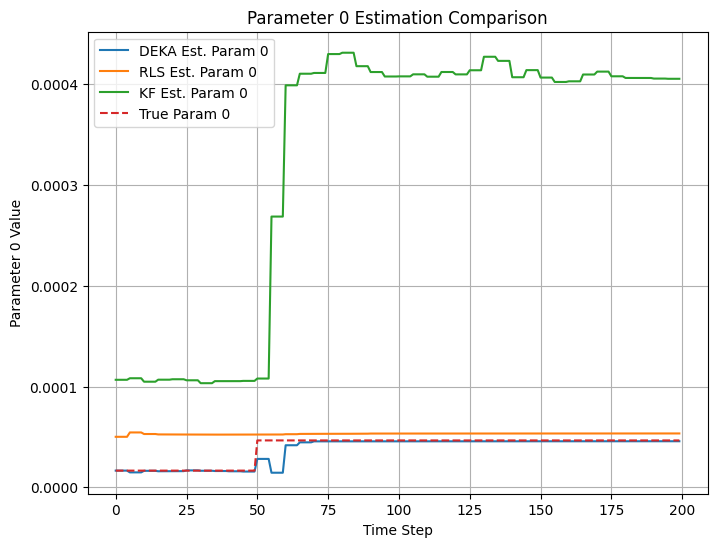

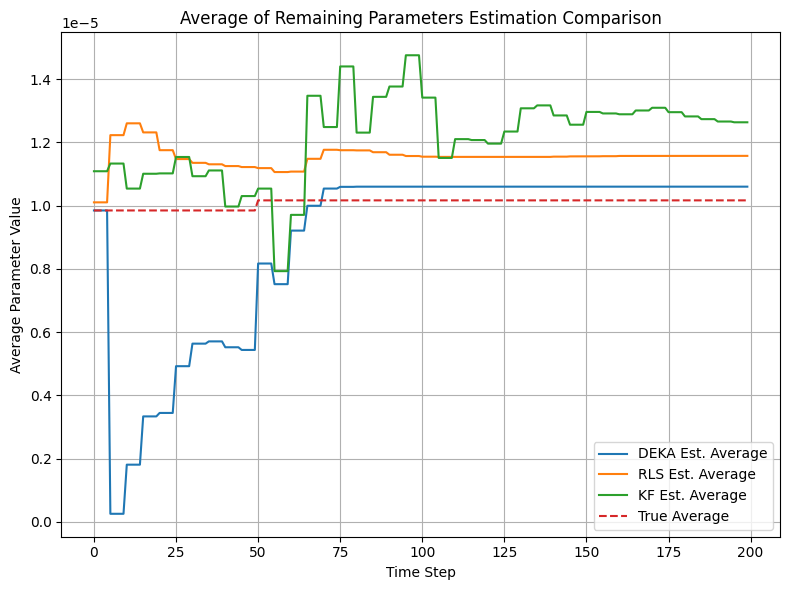

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assume the following arrays are already defined:
# t: a 1D array for time steps
# theta_hat_deka_array: estimated parameters from DEKA, shape (N, num_params)
# theta_hat_rls_array: estimated parameters from RLS, shape (N, num_params)
# theta_hat_ekf_array: estimated parameters from EKF, shape (N, num_params)
# theta_deka_array: true parameter values, shape (N, num_params)

# ---------------------------
# Figure 1: Parameter 0 (shifted parameter)
# ---------------------------
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.plot(t, theta_hat_deka_array[:, 0], label='DEKA Est. Param 0')
ax1.plot(t, theta_hat_rls_array[:, 0], label='RLS Est. Param 0')
ax1.plot(t, theta_hat_ekf_array[:, 0], label='KF Est. Param 0')
ax1.plot(t, theta_deka_array[:, 0], '--', label='True Param 0')

ax1.set_title('Parameter 0 Estimation Comparison')
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Parameter 0 Value')
ax1.legend()
ax1.grid(True)

# ---------------------------
# Figure 2: Average of Remaining Parameters (parameters 1 to end)
# ---------------------------
# Compute the average (across parameters indices 1 to end) for each time step.
theta_hat_deka_avg = np.mean(theta_hat_deka_array[:, 1:], axis=1)
theta_hat_rls_avg  = np.mean(theta_hat_rls_array[:, 1:], axis=1)
theta_hat_ekf_avg  = np.mean(theta_hat_ekf_array[:, 1:], axis=1)
theta_deka_avg     = np.mean(theta_deka_array[:, 1:], axis=1)

fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.plot(t, theta_hat_deka_avg, label='DEKA Est. Average')
ax2.plot(t, theta_hat_rls_avg, label='RLS Est. Average')
ax2.plot(t, theta_hat_ekf_avg, label='KF Est. Average')
ax2.plot(t, theta_deka_avg, '--', label='True Average')

ax2.set_title('Average of Remaining Parameters Estimation Comparison')
ax2.set_xlabel('Time Step')
ax2.set_ylabel('Average Parameter Value')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


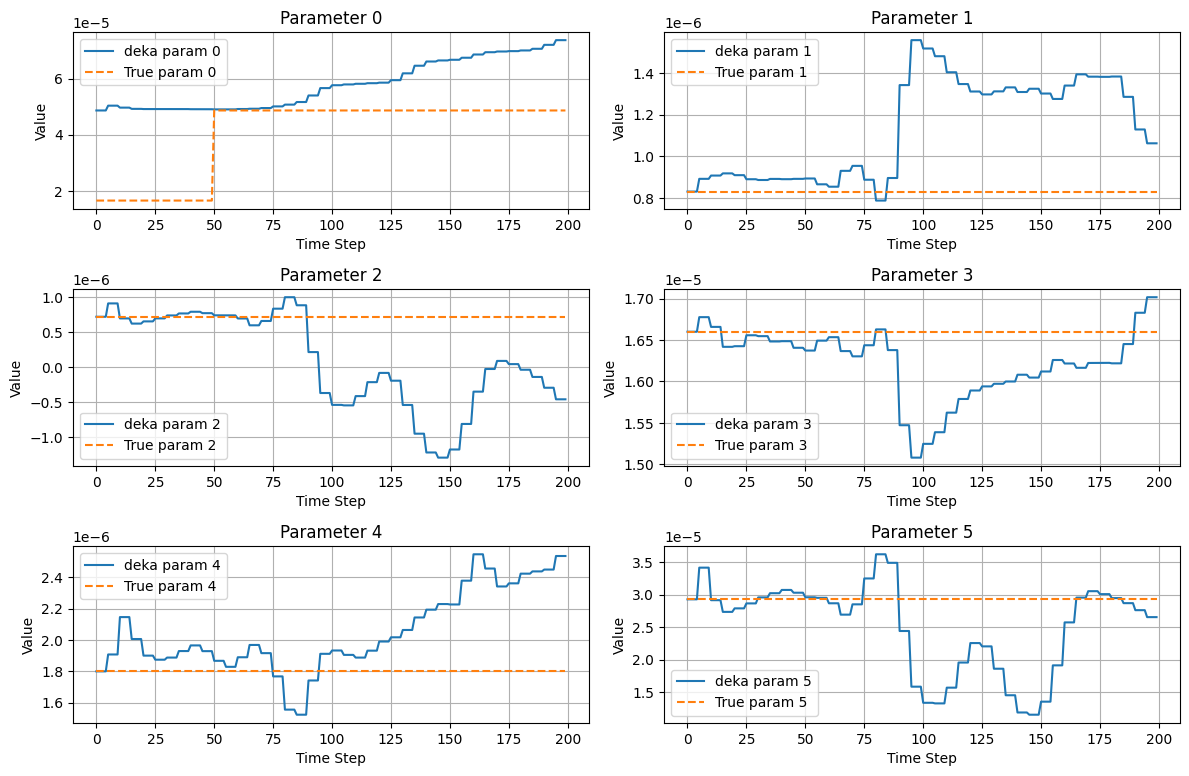

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(12, 10))
axs = axs.flatten()  # Make it a 1D list of axes for easy iteration

for j in range(6):
    axs[j].plot(t, theta_hat_rls_array[:, j], label=f'deka param {j}')
    axs[j].plot(t, theta_deka_array[:, j], '--', label=f'True param {j}')
    axs[j].set_title(f'Parameter {j}')
    axs[j].set_xlabel('Time Step')
    axs[j].set_ylabel('Value')
    axs[j].legend()
    axs[j].grid(True)

# Hide the 8th subplot if you only have 7 params
axs[-1].set_visible(False)
axs[-2].set_visible(False)

plt.tight_layout()
plt.show()

## Simulate 100 times to obtain average mse comparison 

In [6]:
import numpy as np
param_est = OnlineParamEst()

num_runs = 100

mse_deka_list = []
mse_rls_list  = []
mse_kf_list  = []

for run_idx in range(num_runs):
    # 1) Run your three simulations
    x_deka,  u_deka,  theta_deka,  theta_hat_deka   = param_est.simulate_quadrotor_hover_with_DEKA()
    x_rls,   u_rls,   theta_rls,   theta_hat_rls    = param_est.simulate_quadrotor_hover_with_RLS()
    x_kf,   u_kf,   theta_kf,   theta_hat_kf    = param_est.simulate_quadrotor_hover_with_KF()
    
    # 2) Convert lists to arrays (if needed)
    theta_deka_array     = np.array(theta_deka)
    theta_hat_deka_array = np.array(theta_hat_deka)
    theta_rls_array      = np.array(theta_rls)
    theta_hat_rls_array  = np.array(theta_hat_rls)
    theta_kf_array      = np.array(theta_kf)
    theta_hat_kf_array  = np.array(theta_hat_kf)

    # 3) Compute MSE for each method in this run
    #    (One single MSE across all time steps & parameters)
    mse_deka = np.mean((theta_hat_deka_array - theta_deka_array)**2)
    mse_rls  = np.mean((theta_hat_rls_array  - theta_rls_array)**2)
    mse_kf  = np.mean((theta_hat_kf_array  - theta_kf_array)**2)

    # 4) Append them to lists for averaging later
    mse_deka_list.append(mse_deka)
    mse_rls_list.append(mse_rls)
    mse_kf_list.append(mse_kf)

# 5) After num_runs, compute average MSE
avg_mse_deka = np.mean(mse_deka_list)
avg_mse_rls  = np.mean(mse_rls_list)
avg_mse_kf  = np.mean(mse_kf_list)

# 6) Print or store these results
print("Average MSE (DEKA):", avg_mse_deka)
print("Average MSE (RLS): ", avg_mse_rls)
print("Average MSE (KF): ", avg_mse_kf)

Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.           

/home/shuosha/projects/Online-Parameter-Estimation-Using-the-Kaczmarz-Method/python/quadrotor_dynamics.py:166: RuntimeWarning: invalid value encountered in scalar add
  [a_p, a_q-w_x*w_z, a_r+w_x*w_y, -w_y*w_z, w_y**2+w_z**2, w_y*w_z],  # τx equation (angular acceleration)


Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.           

/home/shuosha/projects/Online-Parameter-Estimation-Using-the-Kaczmarz-Method/python/quadrotor_dynamics.py:166: RuntimeWarning: invalid value encountered in scalar subtract
  [a_p, a_q-w_x*w_z, a_r+w_x*w_y, -w_y*w_z, w_y**2+w_z**2, w_y*w_z],  # τx equation (angular acceleration)


Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.           

/home/shuosha/projects/Online-Parameter-Estimation-Using-the-Kaczmarz-Method/python/estimation_methods.py:527: RuntimeWarning: overflow encountered in square
  max_ratio = np.max(np.abs(residual) ** 2 / A_row_norms_sq)
/home/shuosha/projects/Online-Parameter-Estimation-Using-the-Kaczmarz-Method/python/estimation_methods.py:527: RuntimeWarning: invalid value encountered in divide
  max_ratio = np.max(np.abs(residual) ** 2 / A_row_norms_sq)
/home/shuosha/projects/Online-Parameter-Estimation-Using-the-Kaczmarz-Method/python/estimation_methods.py:532: RuntimeWarning: overflow encountered in square
  eta_k = np.where(residual ** 2 / A_row_norms_sq >= epsilon_k * res_norm_sq, residual, 0).reshape(-1, 1)
/home/shuosha/projects/Online-Parameter-Estimation-Using-the-Kaczmarz-Method/python/estimation_methods.py:532: RuntimeWarning: invalid value encountered in divide
  eta_k = np.where(residual ** 2 / A_row_norms_sq >= epsilon_k * res_norm_sq, residual, 0).reshape(-1, 1)


Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.           

/home/shuosha/projects/Online-Parameter-Estimation-Using-the-Kaczmarz-Method/python/LQR_controller.py:39: RuntimeWarning: invalid value encountered in matmul
  return u_nom - K_lqr @ delta_x


Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.           